# Teaching Assistance Performance Prediction by Thiyaneshwaran Nagarajan

## To predict the overall performance of instructors

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and reading the data
data = pd.read_csv("dataset_48_tae.csv")
print(data.shape)
data.head()

(151, 6)


,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:
150# Changing the longer column names
data.rename(columns={"Whether_of_not_the_TA_is_a_native_English_speaker":"Native_English_speaker","Summer_or_regular_semester":"Semester"},inplace=True)

In [4]:
data.head(2)

,Native_English_speaker,Course_instructor,Course,Semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3


### Feature Explanation 

In [5]:
# English_speaker
# 1 --> Native speaker
# 2 --> Non-native speaker
# Semester
# 1 --> Summer Semester
# 2 --> Regular Semester

In [6]:
# Unique values in each feature
data.nunique()

Native_English_speaker     2
Course_instructor         25
Course                    26
Semester                   2
Class_size                46
Class_attribute            3
dtype: int64

In [7]:
# checking the info and Null values of the "data" dataframe
print(data.info())
print("\n Number of Null Values in each feature")
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Native_English_speaker  151 non-null    int64
 1   Course_instructor       151 non-null    int64
 2   Course                  151 non-null    int64
 3   Semester                151 non-null    int64
 4   Class_size              151 non-null    int64
 5   Class_attribute         151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB
None

 Number of Null Values in each feature


Native_English_speaker    0
Course_instructor         0
Course                    0
Semester                  0
Class_size                0
Class_attribute           0
dtype: int64

#### Correlation of the features

In [8]:
print(data.duplicated().sum())
data.corrwith(data.Class_attribute)

41


Native_English_speaker   -0.255466
Course_instructor         0.075095
Course                    0.143103
Semester                 -0.282742
Class_size               -0.035676
Class_attribute           1.000000
dtype: float64

# Exploratory Data Analysis

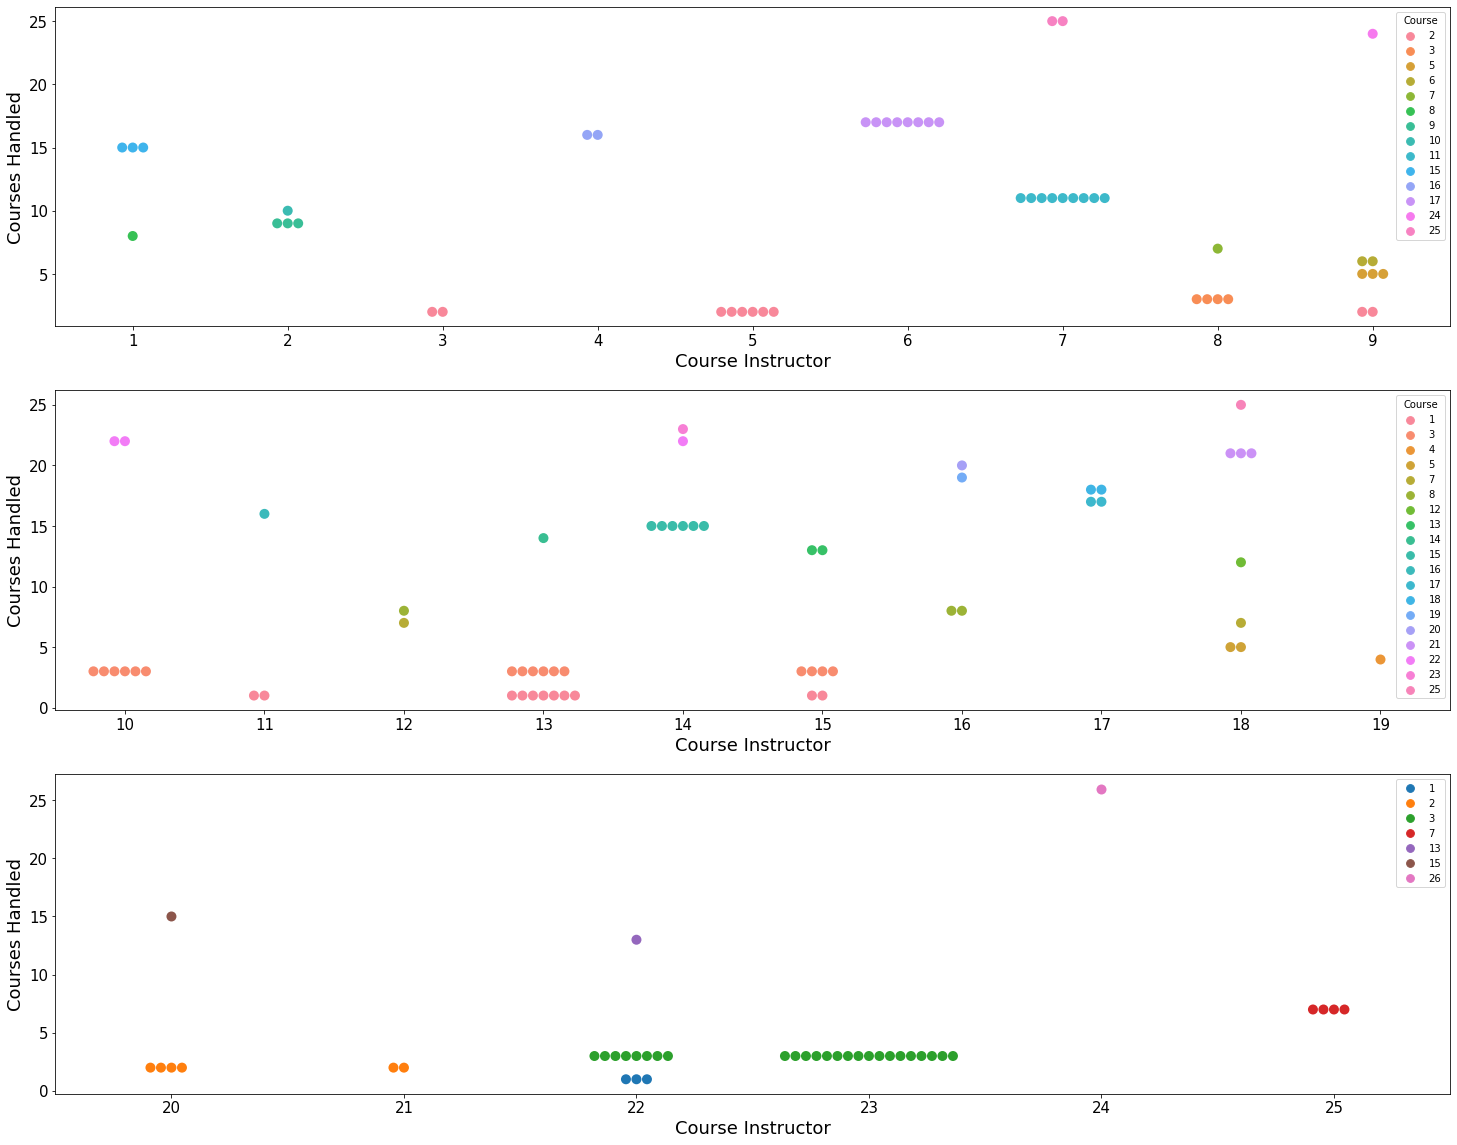

In [9]:
fig,ax=plt.subplots(3,1,figsize=(25,20))
sns.swarmplot(x='Course_instructor',y='Course',data=data[data.Course_instructor<=9],ax=ax[0],size=10,hue='Course')
sns.swarmplot(x='Course_instructor',y='Course',data=data[(data.Course_instructor>9)& (data.Course_instructor<=19)],ax=ax[1],size=10,hue='Course')
sns.swarmplot(x='Course_instructor',y='Course',data=data[data.Course_instructor>19],ax=ax[2],size=10,hue='Course')
ax[0].tick_params(axis='both',labelsize=15)
ax[1].tick_params(axis='both',labelsize=15)
ax[2].tick_params(axis='both',labelsize=15)
ax[0].set_xlabel("Course Instructor", fontsize=18)
ax[0].set_ylabel("Courses Handled", fontsize=18)
ax[1].set_xlabel("Course Instructor", fontsize=18)
ax[1].set_ylabel("Courses Handled", fontsize=18)
ax[2].set_xlabel("Course Instructor", fontsize=18)
ax[2].set_ylabel("Courses Handled", fontsize=18)
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Class Size')

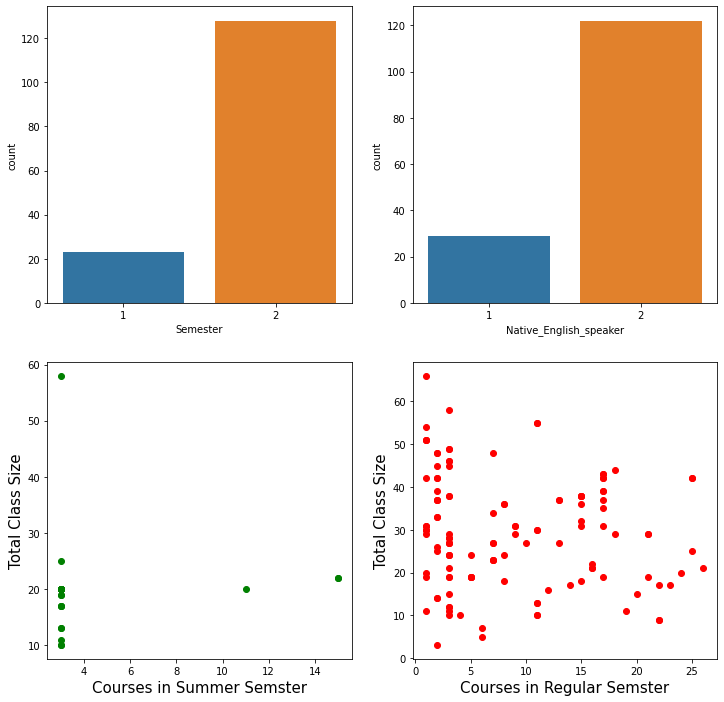

In [10]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
sns.countplot(data.Semester, ax=ax[0,0]) 
sns.countplot(data.Native_English_speaker, ax=ax[0,1]) 
ax[1,0].scatter(data.Course[data.Semester==1],data.Class_size[data.Semester==1],color='g')
ax[1,0].set_xlabel('Courses in Summer Semster',fontsize=15)
ax[1,0].set_ylabel('Total Class Size',fontsize=15)
ax[1,1].scatter(data.Course[data.Semester==2],data.Class_size[data.Semester==2],color='r')
ax[1,1].set_xlabel('Courses in Regular Semster',fontsize=15)
ax[1,1].set_ylabel('Total Class Size',fontsize=15)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

Text(0, 0.5, 'Count')

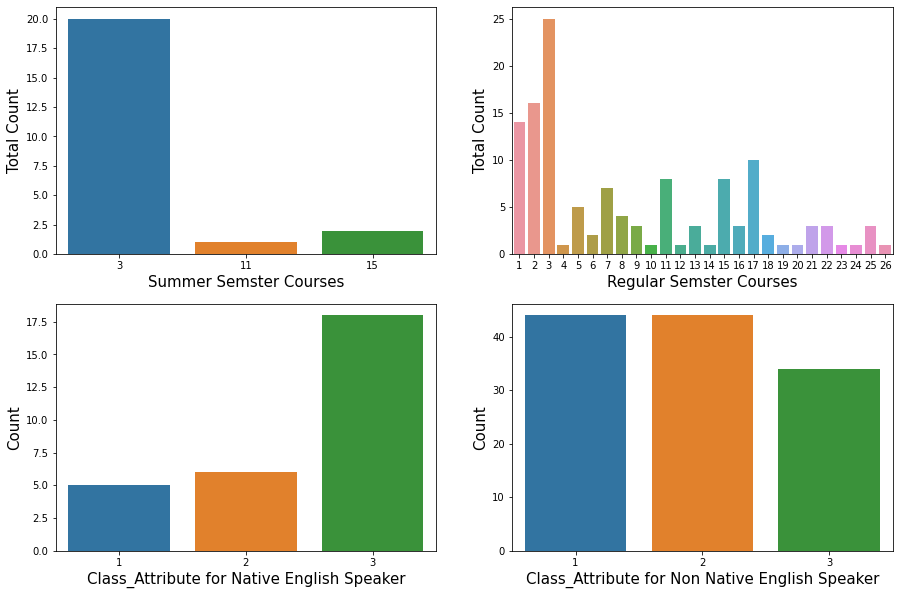

In [11]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(data.Course[data.Semester==1], ax=ax[0,0]) 
ax[0,0].set_xlabel('Summer Semster Courses',fontsize=15)
ax[0,0].set_ylabel('Total Count',fontsize=15)
sns.countplot(data.Course[data.Semester==2], ax=ax[0,1]) 
ax[0,1].set_xlabel('Regular Semster Courses',fontsize=15)
ax[0,1].set_ylabel('Total Count',fontsize=15)
sns.countplot(data.Class_attribute[data.Native_English_speaker==1],ax=ax[1,0])
ax[1,0].set_xlabel('Class_Attribute for Native English Speaker',fontsize=15)
ax[1,0].set_ylabel('Count',fontsize=15)
sns.countplot(data.Class_attribute[data.Native_English_speaker==2],ax=ax[1,1])
ax[1,1].set_xlabel('Class_Attribute for Non Native English Speaker',fontsize=15)
ax[1,1].set_ylabel('Count',fontsize=15)

<AxesSubplot:xlabel='Course_instructor', ylabel='Semester'>

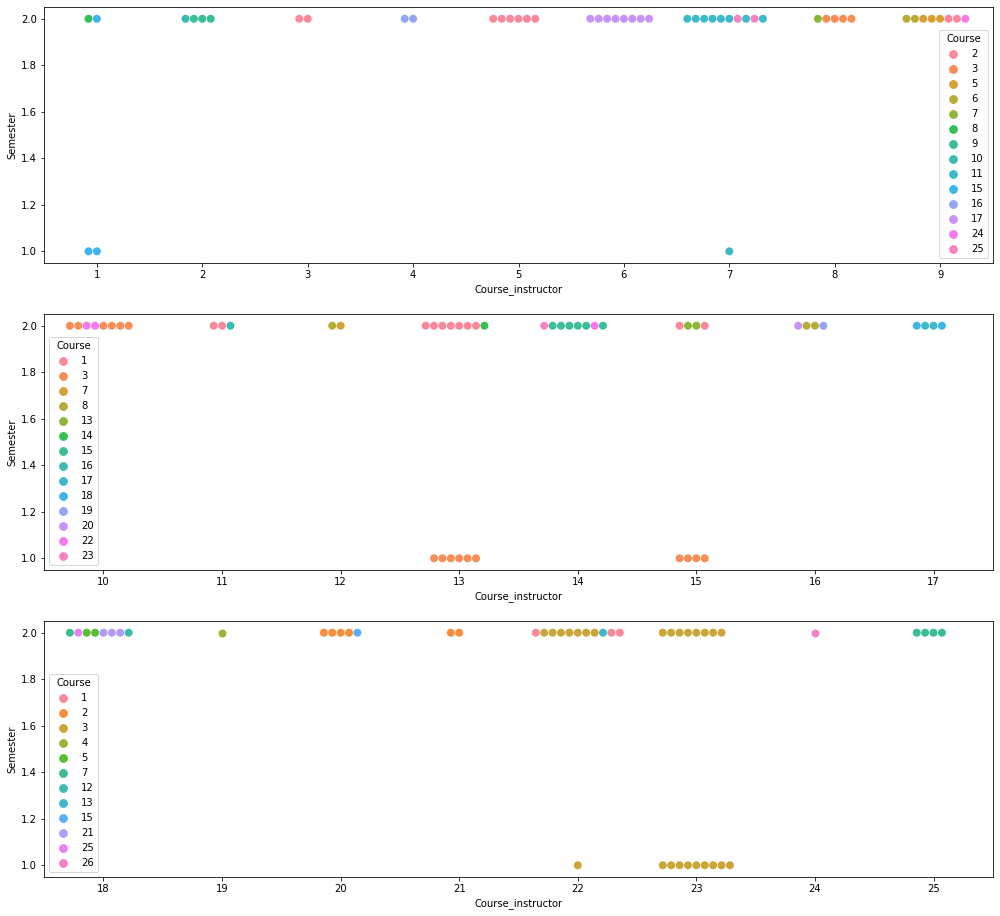

In [12]:
fig,ax=plt.subplots(3,1,figsize=(17,16))
sns.swarmplot(x='Course_instructor',y='Semester',size=8,data=data[data.Course_instructor<=9],hue="Course",ax=ax[0])
sns.swarmplot(x='Course_instructor',y='Semester',size=8,data=data[(data.Course_instructor>9)&(data.Course_instructor<18)],hue="Course",ax=ax[1])
sns.swarmplot(x='Course_instructor',y='Semester',size=8,data=data[data.Course_instructor>=18],hue="Course",ax=ax[2])

### Checking for Balanced data

In [13]:
from collections import Counter
Counter(data.Class_attribute)

Counter({3: 52, 2: 50, 1: 49})

#### The feature"Class_attribute" is balanced with class labels

In [14]:
Counter(data.Course)

Counter({3: 45,
         2: 16,
         11: 9,
         5: 5,
         22: 3,
         1: 14,
         21: 3,
         17: 10,
         25: 3,
         7: 7,
         9: 3,
         15: 10,
         13: 3,
         8: 4,
         16: 3,
         19: 1,
         14: 1,
         6: 2,
         12: 1,
         18: 2,
         23: 1,
         26: 1,
         24: 1,
         20: 1,
         4: 1,
         10: 1})

#### But the feature "Course" is not balanced. Here we can see, there are courses with only one data. While splitting the data for training and testing, there is high chance for the split method to leave some of the courses in the training data set. So, it is necessary to oversample with respect to courses.

# Oversampling with respect to Courses

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
random_oversampler = RandomOverSampler()

data2=data.loc[ : , data.columns != 'Course']
y1=data.Course
data3, y1_data3= random_oversampler.fit_resample(data2,y1)

#### Creating a new dataframe "data3" with the oversampled data

In [16]:
data3['Course']=y1_data3
data3

,Native_English_speaker,Course_instructor,Semester,Class_size,Class_attribute,Course
0,1,23,1,19,3,3
1,2,15,1,17,3,3
2,1,23,2,49,3,3
3,1,5,2,33,3,2
4,2,7,2,55,3,11
...,...,...,...,...,...,...
1165,2,24,2,21,2,26
1166,2,24,2,21,2,26
1167,2,24,2,21,2,26
1168,2,24,2,21,2,26


In [17]:
Counter(data3.Course)

Counter({3: 45,
         2: 45,
         11: 45,
         5: 45,
         22: 45,
         1: 45,
         21: 45,
         17: 45,
         25: 45,
         7: 45,
         9: 45,
         15: 45,
         13: 45,
         8: 45,
         16: 45,
         19: 45,
         14: 45,
         6: 45,
         12: 45,
         18: 45,
         23: 45,
         26: 45,
         24: 45,
         20: 45,
         4: 45,
         10: 45})

#### Now the data is balanced with respect to courses

# Features Selection

In [18]:
X = data3.loc[ : , data3.columns != 'Class_attribute']
y = data3.Class_attribute

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y)
print(X_train.shape)
y_train.shape

(877, 5)


(877,)

In [20]:
X.head()

,Native_English_speaker,Course_instructor,Semester,Class_size,Course
0,1,23,1,19,3
1,2,15,1,17,3
2,1,23,2,49,3
3,1,5,2,33,2
4,2,7,2,55,11


In [21]:
Counter(y_train)

Counter({1: 264, 2: 352, 3: 261})

#### The data in y_train is almost balanced

# Defining the various classification ML models

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
model_KNN = KNeighborsClassifier(n_neighbors= 5)
model_SVC = SVC(random_state=7)
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_XGB = XGBClassifier(eval_metric='mlogloss')
model_NB = BernoulliNB()

In [23]:
import warnings
warnings.filterwarnings("ignore")

## Fitting the above defined ML models

In [24]:
# KNN
model_KNN.fit(X_train, y_train)
y_predict_KNN = model_KNN.predict(X_test)
# SVM
model_SVC.fit(X_train, y_train)
y_predict_SVC = model_SVC.predict(X_test)
# Decision Tree
model_tree.fit(X_train, y_train)
y_predict_tree = model_tree.predict(X_test)
# Random Forest
model_forest.fit(X_train, y_train)
y_predict_forest = model_forest.predict(X_test)
# XG Boost
model_XGB.fit(X_train, y_train)
y_predict_XGB = model_XGB.predict(X_test)
# Naives Baiyes
model_NB.fit(X_train, y_train)
y_predict_NB = model_NB.predict(X_test)

## Accuracy scores of various ML models

[0.9590443686006825, 0.6143344709897611, 0.9761092150170648, 0.9795221843003413, 0.9795221843003413, 0.447098976109215]


Text(0, 0.5, 'Accuracy Score')

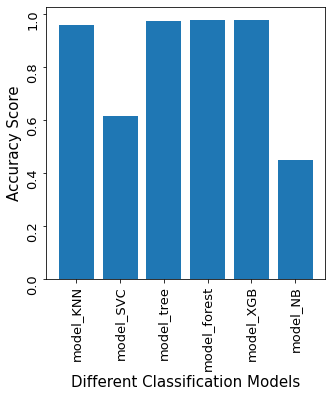

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_KNN =accuracy_score(y_test,y_predict_KNN)
accuracy_SVC=accuracy_score(y_test,y_predict_SVC)
accuracy_tree=accuracy_score(y_test,y_predict_tree)
accuracy_forest=accuracy_score(y_test,y_predict_forest)
accuracy_XGB=accuracy_score(y_test,y_predict_XGB)
accuracy_NB=accuracy_score(y_test,y_predict_NB)
models_names=["model_KNN","model_SVC","model_tree","model_forest","model_XGB","model_NB"]
score=[accuracy_KNN,accuracy_SVC,accuracy_tree,accuracy_forest,accuracy_XGB,accuracy_NB]
print(score)
fig,ax=plt.subplots(figsize=(5,5))
ax.bar(models_names,score)
ax.tick_params(axis='both',labelsize=13,rotation=90)
ax.set_xlabel('Different Classification Models',fontsize=15)
ax.set_ylabel('Accuracy Score',fontsize=15)

#### The Decision Tree, Random Forest and XG Boost gave almost similar Accuracy Score 

# Confusion Matrix

In [26]:
#Confusion Matrix for Decision Tree
confusion_tree = confusion_matrix(y_test,y_predict_tree)
confusion_tree

array([[ 84,   1,   0],
       [  4, 126,   1],
       [  0,   1,  76]], dtype=int64)

In [27]:
#Confusion Matrix for Random Forest
confusion_forest = confusion_matrix(y_test,y_predict_forest)
confusion_forest

array([[ 84,   1,   0],
       [  3, 126,   2],
       [  0,   0,  77]], dtype=int64)

In [28]:
#Confusion Matrix for XG Boost
confusion_XGB = confusion_matrix(y_test,y_predict_XGB)
confusion_XGB

array([[ 85,   0,   0],
       [  3, 126,   2],
       [  1,   0,  76]], dtype=int64)

#### The Decision Tree, Random Forest and XG Boost gives similar Predicion and Confusion Matrix 

# K Fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
models= [model_KNN,model_SVC,model_tree,model_forest,model_XGB,model_NB]
def cross_val(models,X,y):
    global avg_cv_scores
    avg_cv_scores=[]
    cv_score_names=['cv_score_KNN','cv_score_SVC','cv_score_tree','cv_score_forest','cv_score_XGB','cv_score_NB']
    global cv_score_names2
    cv_score_names2=['cv_score_KNN','cv_score_SVC','cv_score_tree','cv_score_forest','cv_score_XGB','cv_score_NB']
    for i in np.arange(0,6):
        cv_score_names[i] = cross_val_score(models[i],X,y,cv=10,scoring='accuracy')
        avg_cv_scores.append(cv_score_names[i].mean())
        print(cv_score_names2[i],':',cv_score_names[i])
        print("Average Accuracy:",cv_score_names[i].mean())
        print("Std :",cv_score_names[i].std())
        print('\n')

In [30]:
cross_val(models,X,y)

cv_score_KNN : [0.69230769 0.54700855 0.47863248 0.91452991 0.92307692 0.47008547
 0.98290598 0.94017094 0.84615385 0.62393162]
Average Accuracy: 0.7418803418803419
Std : 0.19194838227910666


cv_score_SVC : [0.54700855 0.52136752 0.41880342 0.41025641 0.74358974 0.67521368
 0.8974359  0.16239316 0.68376068 0.32478632]
Average Accuracy: 0.5384615384615385
Std : 0.20711290572117552


cv_score_tree : [0.76923077 0.83760684 1.         1.         1.         0.92307692
 1.         0.99145299 1.         1.        ]
Average Accuracy: 0.9521367521367521
Std : 0.07918793040615704


cv_score_forest : [0.79487179 0.83760684 1.         1.         1.         0.92307692
 1.         0.99145299 1.         1.        ]
Average Accuracy: 0.9547008547008546
Std : 0.0734296978076694


cv_score_XGB : [0.78632479 0.70940171 1.         1.         1.         0.92307692
 1.         0.99145299 1.         1.        ]
Average Accuracy: 0.941025641025641
Std : 0.10065531500713087


cv_score_NB : [0.41880342 0.41025

### Cross Validation Accuracy Score Plot

[0.7418803418803419, 0.5384615384615385, 0.9521367521367521, 0.9547008547008546, 0.941025641025641, 0.4128205128205128]


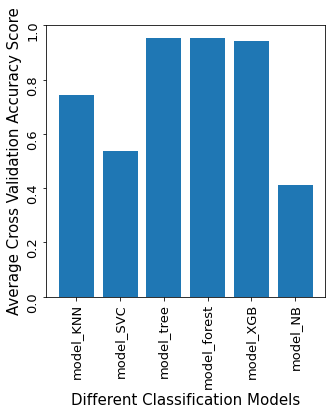

In [31]:
print(avg_cv_scores)
fig,ax=plt.subplots(figsize=(5,5))
ax.bar(models_names,avg_cv_scores)
ax.set_xlabel('Different Classification Models',fontsize=15)
ax.set_ylabel('Average Cross Validation Accuracy Score',fontsize=15)
ax.tick_params(axis='both',labelsize=13,rotation=90)

#### Leaving out K-Nearesr Neighbours, Support Vector Classification and Naives Baiyes for Hyper Parameter Tuning, as they give very low accuracy score.

# Hyper Parameter Tuning

### Hyper Paramter tuning for Decision Tree, Random Forest and XG Boost

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters_tree = {'random_state': [7,10,12,15,17,20,22,25,30,35,40,45,50]}  
parameters_forest = {'random_state': [7,10,12,15,17,20,22,25,30,35,40,45,50],
                      'n_estimators':np.arange(7,15) 
                     }  
parameters_XGB = {'random_state': [7,10,12,15,17,20,22,25,30,35,40,45,50]} #[7,10,12,15,17,20,22,25,30,35,40,45,50] #[7,10,12,15]
parameters=[0,0,parameters_tree,parameters_forest,parameters_XGB]

def hyper_parameter(models,X,y):
    Classifier=['0','0','Decision Tree','Random Forest','XGB Boost']
    global grid_names
    grid_names=['0','0','grid_tree','grid_forest','grid_XGB']
    for i in np.arange(2,5):
        grid_names[i] = GridSearchCV(models[i],parameters[i],cv=10,verbose=1)
        grid_names[i].fit(X,y)
        print("Best Score for ",Classifier[i],"model is", grid_names[i].best_score_)
        print("Best Parameters for ",Classifier[i],"model is", grid_names[i].best_params_)
        print('\n')

In [33]:
hyper_parameter(models,X,y)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
Best Score for  Decision Tree model is 0.9529914529914529
Best Parameters for  Decision Tree model is {'random_state': 12}


Fitting 10 folds for each of 104 candidates, totalling 1040 fits
Best Score for  Random Forest model is 0.9658119658119657
Best Parameters for  Random Forest model is {'n_estimators': 10, 'random_state': 45}


Fitting 10 folds for each of 13 candidates, totalling 130 fits
Best Score for  XGB Boost model is 0.941025641025641
Best Parameters for  XGB Boost model is {'random_state': 7}




#### The random forest classifier gives the highest accuracy score

## Best parameters for Random Forest Model

In [34]:
grid_names[3].best_params_

{'n_estimators': 10, 'random_state': 45}

### Choosing Random forest model than others to avoid overfitting

# Final Random Forest Model with Hyper Tuned Parameters

### Final Model with Cross Vals Score

In [35]:
final_model_forest = RandomForestClassifier(n_estimators=grid_names[3].best_params_['n_estimators'], random_state=grid_names[3].best_params_['random_state'])
final_cv_score = cross_val_score(final_model_forest,X,y,cv=10,scoring='accuracy')
print(final_cv_score)
print("Final Random Forest Model CV Average Accuracy Score: ", final_cv_score.mean())

[0.79487179 0.87179487 1.         1.         1.         1.
 1.         0.99145299 1.         1.        ]
Final Random Forest Model CV Average Accuracy Score:  0.9658119658119657


### Explicit Stratified K fold Final Model

In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True)
accuracy_score_final=[]
conf_matrix=[]
i=1
for train_index, test_index in skf.split(X=X,y=y):
    Xf_train, Xf_test = X.loc[train_index], X.loc[test_index]
    yf_train, yf_test = y[train_index], y[test_index]
    final_model_forest.fit(Xf_train,yf_train)
    y_predict_final= final_model_forest.predict(Xf_test)
    score_final=accuracy_score(yf_test,y_predict_final)
    accuracy_score_final.append(score_final)
    conf=confusion_matrix(yf_test,y_predict_final)
    conf_matrix.append(conf)
    class_report = classification_report(yf_test,y_predict_final)
    print("Classification Report of", i ,"K Fold is",'\n',class_report)
    i+=1

Classification Report of 1 K Fold is 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96        34
           2       0.94      1.00      0.97        49
           3       1.00      0.94      0.97        34

    accuracy                           0.97       117
   macro avg       0.97      0.96      0.97       117
weighted avg       0.97      0.97      0.97       117

Classification Report of 2 K Fold is 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        34

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Classification Report of 3 K Fold is 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2

### Accuracy Scores of 10 Stratified K fold

In [37]:
accuracy_score_final

[0.9658119658119658,
 1.0,
 1.0,
 0.9829059829059829,
 0.9914529914529915,
 0.9743589743589743,
 0.9914529914529915,
 0.9743589743589743,
 0.9743589743589743,
 0.9743589743589743]

### Average Accuracy Score

In [38]:
np.array(accuracy_score_final).mean()

0.982905982905983

### Confusion Matrix of 10 Stratified K fold

In [39]:
b=1
for v in np.arange (0,10):
    print("Confusion Matrix of", b ,"K Fold is",'\n',conf_matrix[v])
    b+=1

Confusion Matrix of 1 K Fold is 
 [[32  2  0]
 [ 0 49  0]
 [ 1  1 32]]
Confusion Matrix of 2 K Fold is 
 [[35  0  0]
 [ 0 48  0]
 [ 0  0 34]]
Confusion Matrix of 3 K Fold is 
 [[35  0  0]
 [ 0 48  0]
 [ 0  0 34]]
Confusion Matrix of 4 K Fold is 
 [[34  1  0]
 [ 0 47  1]
 [ 0  0 34]]
Confusion Matrix of 5 K Fold is 
 [[34  1  0]
 [ 0 48  0]
 [ 0  0 34]]
Confusion Matrix of 6 K Fold is 
 [[35  0  0]
 [ 0 47  1]
 [ 0  2 32]]
Confusion Matrix of 7 K Fold is 
 [[35  0  0]
 [ 1 47  0]
 [ 0  0 34]]
Confusion Matrix of 8 K Fold is 
 [[34  1  0]
 [ 1 47  0]
 [ 0  1 33]]
Confusion Matrix of 9 K Fold is 
 [[35  0  0]
 [ 1 47  1]
 [ 0  1 32]]
Confusion Matrix of 10 K Fold is 
 [[34  0  1]
 [ 1 48  0]
 [ 1  0 32]]


# Dumping the model using Joblib for Api

In [40]:
import joblib 
joblib.dump(final_model_forest,'teaching_assistance.pkl')

['teaching_assistance.pkl']